In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
os.chdir(sys.path[0])
os.makedirs(os.path.join("pic","vol"), exist_ok=True)
subject = 'ctchen'
vol = np.load(os.path.join('ultrasound_image_processing',
              f'{subject}_perturbed_small_to_large.npy'))
vol = vol.T
# plt.imshow(vol[:,:,int(vol.shape[2]//2)])
# plt.imshow(vol[:,int(vol.shape[1]//2),:])
# plt.imshow(vol[0,:,:])

vol = vol[::4, ::4, ::12]
cmap = ['red', 'salmon', 'sienna', 'silver',
        'tan', 'white', 'violet', 'wheat', 'yellow']

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e


vol = explode(vol)

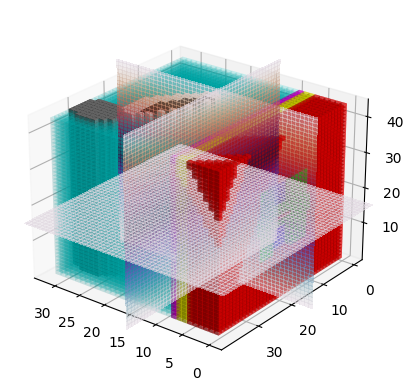

In [3]:

colors = np.empty(list(vol.shape) + [4], dtype=np.float32)
alpha = 0.5
colors[vol == 1] = [1, 0, 0, alpha]
colors[vol == 2] = [0, 1, 0, alpha]
colors[vol == 3] = [0, 0, 1, alpha]
colors[vol == 4] = [1, 1, 0, alpha]
colors[vol == 5] = [1, 0, 1, alpha]
colors[vol == 6] = [0, 1, 1, 0.1]
colors[vol == 7] = [1, 1, 1, 1]
colors[vol == 8] = [0, 0, 0, 1]
colors[vol == 9] = [0.5, 0.5, 0.5, 1]
edgecolor = [1, 1, 1, 0]

x, y, z = np.indices(np.array(vol.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95


ax = plt.figure().add_subplot(projection='3d')

# horizontal
Y = np.linspace(-y.max()*0.1, y.max()+y.max()*0.1, 100)
Z = np.linspace(-z.max()*0.1, z.max()+z.max()*0.1, 100)
Y, Z = np.meshgrid(Y, Z)
X = np.ones(np.shape(Y))*x.max()//2
surf = ax.plot_surface(X, Y, Z, alpha=0.5, cmap=plt.cm.twilight,
                       linewidth=0, antialiased=False)
# frontal plane
X = np.linspace(-x.max()*0.1, x.max()+x.max()*0.1, 100)
Z = np.linspace(-z.max()*0.1, z.max()+z.max()*0.1, 100)
X, Z = np.meshgrid(X, Z)
Y = np.ones(np.shape(X))*x.max()//2
surf = ax.plot_surface(X, Y, Z, alpha=0.5, cmap=plt.cm.twilight,
                       linewidth=0, antialiased=False)
# # sagittal plane
X = np.linspace(-x.max()*0.1, x.max()+x.max()*0.1, 100)
Y = np.linspace(-y.max()*0.1, y.max()+y.max()*0.1, 100)
X, Y = np.meshgrid(X, Y)
Z = np.ones(np.shape(X))*x.max()//2
surf = ax.plot_surface(X, Y, Z, alpha=0.5, cmap=plt.cm.twilight,
                       linewidth=0, antialiased=False)


ax.voxels(x, y, z, vol, facecolors=colors, edgecolor=edgecolor)
ax.view_init(25, 128)
plt.savefig(os.path.join("pic","vol","vol3d_withPlane.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

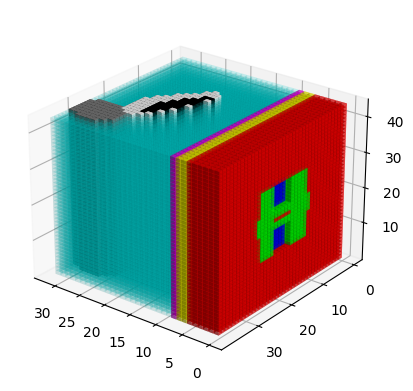

In [4]:
colors = np.empty(list(vol.shape) + [4], dtype=np.float32)
alpha = 0.5
colors[vol == 1] = [1, 0, 0, alpha]
colors[vol == 2] = [0, 1, 0, alpha]
colors[vol == 3] = [0, 0, 1, alpha]
colors[vol == 4] = [1, 1, 0, alpha]
colors[vol == 5] = [1, 0, 1, alpha]
colors[vol == 6] = [0, 1, 1, 0.1]
colors[vol == 7] = [1, 1, 1, 1]
colors[vol == 8] = [0, 0, 0, 1]
colors[vol == 9] = [0.5, 0.5, 0.5, 1]
edgecolor = [1, 1, 1, 0]

x, y, z = np.indices(np.array(vol.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95


ax = plt.figure().add_subplot(projection='3d')

ax.voxels(x, y, z, vol, facecolors=colors, edgecolor=edgecolor)
ax.view_init(25, 128)
plt.savefig(os.path.join("pic","vol","vol3d.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()